In [ ]:
# Código para calcular métricas de classificação no Google Colab
def calcular_metricas(vp, vn, fp, fn):
    # Cálculo das métricas
    acuracia = (vp + vn) / (vp + vn + fp + fn)
    recall = vp / (vp + fn) if (vp + fn) != 0 else 0
    especificidade = vn / (vn + fp) if (vn + fp) != 0 else 0
    precisao = vp / (vp + fp) if (vp + fp) != 0 else 0
    f_score = (2 * precisao * recall) / (precisao + recall) if (precisao + recall) != 0 else 0

    # Exibir os resultados
    return {
        "Acurácia": acuracia,
        "Recall (Sensibilidade)": recall,
        "Especificidade": especificidade,
        "Precisão": precisao,
        "F-Score": f_score
    }

# Código para ser executado no Google Colab
if __name__ == "__main__":
    # Matriz de confusão (valores arbitrários)
    vp = 50  # Verdadeiros Positivos
    vn = 100 # Verdadeiros Negativos
    fp = 5   # Falsos Positivos
    fn = 10  # Falsos Negativos

    # Cálculo das métricas
    metricas = calcular_metricas(vp, vn, fp, fn)

    # Exibindo os resultados
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor:.2f}")

Acurácia: 0.91
Recall (Sensibilidade): 0.83
Especificidade: 0.95
Precisão: 0.91
F-Score: 0.87


AUMENTAR O RECALL

In [ ]:
# Código para calcular métricas de classificação no Google Colab
from sklearn.metrics import precision_recall_curve, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

def calcular_metricas(vp, vn, fp, fn):
    # Cálculo das métricas
    acuracia = (vp + vn) / (vp + vn + fp + fn)
    recall = vp / (vp + fn) if (vp + fn) != 0 else 0
    especificidade = vn / (vn + fp) if (vn + fp) != 0 else 0
    precisao = vp / (vp + fp) if (vp + fp) != 0 else 0
    f_score = (2 * precisao * recall) / (precisao + recall) if (precisao + recall) != 0 else 0

    # Exibir os resultados
    return {
        "Acurácia": acuracia,
        "Recall (Sensibilidade)": recall,
        "Especificidade": especificidade,
        "Precisão": precisao,
        "F-Score": f_score
    }

# Função para ajustar o limiar de classificação
def ajustar_limiar(modelo, X_test, y_test):
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Encontrar o limiar que maximiza o recall
    melhor_limiar = thresholds[np.argmax(recall)]
    print(f"Melhor limiar para maximizar o recall: {melhor_limiar:.2f}")

    # Aplicar o novo limiar
    y_pred_ajustado = (y_pred_proba >= melhor_limiar).astype(int)
    return y_pred_ajustado

# Função para balancear os dados usando SMOTE
def balancear_dados(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)
    return X_balanced, y_balanced

# Código principal para ser executado no Google Colab
if __name__ == "__main__":
    # Dados de exemplo (substitua pelos seus dados reais)
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Balancear os dados de treino
    X_train_balanced, y_train_balanced = balancear_dados(X_train, y_train)

    # Treinar um modelo (Random Forest como exemplo)
    modelo = RandomForestClassifier(class_weight="balanced", random_state=42)
    modelo.fit(X_train_balanced, y_train_balanced)

    # Fazer previsões no conjunto de teste
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Ajustar o limiar para maximizar o recall
    y_pred_ajustado = ajustar_limiar(modelo, X_test, y_test)

    # Calcular a matriz de confusão
    from sklearn.metrics import confusion_matrix
    vp, fp, fn, vn = confusion_matrix(y_test, y_pred_ajustado).ravel()

    # Calcular as métricas
    metricas = calcular_metricas(vp, vn, fp, fn)

    # Exibir os resultados
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor:.2f}")

    # Calcular F2-Score (dá mais peso ao recall)
    f2_score = fbeta_score(y_test, y_pred_ajustado, beta=2)
    print(f"F2-Score: {f2_score:.2f}")

Melhor limiar para maximizar o recall: 0.00
Acurácia: 0.10
Recall (Sensibilidade): 0.00
Especificidade: 0.10
Precisão: 0.00
F-Score: 0.00
F2-Score: 0.36


In [ ]:
# Função corrigida para ajustar o limiar
def ajustar_limiar(modelo, X_test, y_test):
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Encontrar o limiar que maximiza o F2-Score
    f2_scores = [fbeta_score(y_test, (y_pred_proba >= t).astype(int), beta=2) for t in thresholds]
    melhor_limiar = thresholds[np.argmax(f2_scores)]
    print(f"Melhor limiar para maximizar o F2-Score: {melhor_limiar:.2f}")

    return (y_pred_proba >= melhor_limiar).astype(int)

# Código principal
if __name__ == "__main__":
    # Dados de exemplo
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Balancear os dados
    X_balanced, y_balanced = balancear_dados(X_train, y_train)

    # Treinar o modelo
    modelo = RandomForestClassifier(class_weight="balanced", random_state=42)
    modelo.fit(X_balanced, y_balanced)

    # Ajustar o limiar
    y_pred_ajustado = ajustar_limiar(modelo, X_test, y_test)

    # Calcular métricas
    vp, fp, fn, vn = confusion_matrix(y_test, y_pred_ajustado).ravel()
    metricas = calcular_metricas(vp, vn, fp, fn)

    # Exibir resultados
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor:.2f}")
    print(f"F2-Score: {fbeta_score(y_test, y_pred_ajustado, beta=2):.2f}")

Melhor limiar para maximizar o F2-Score: 0.47
Acurácia: 0.92
Recall (Sensibilidade): 0.97
Especificidade: 0.59
Precisão: 0.94
F-Score: 0.96
F2-Score: 0.72


Melhor limiar para equilibrar Recall e Especificidade: 0.47


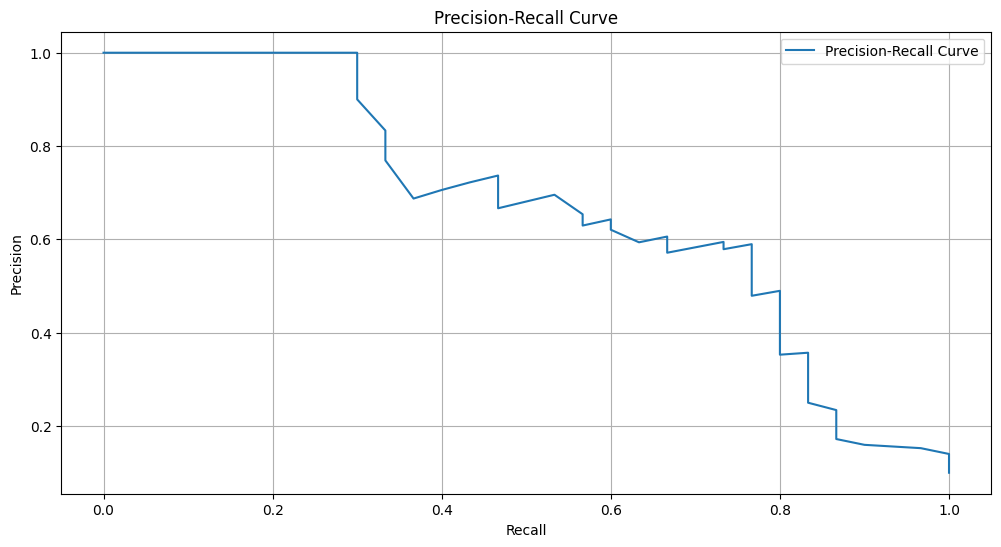

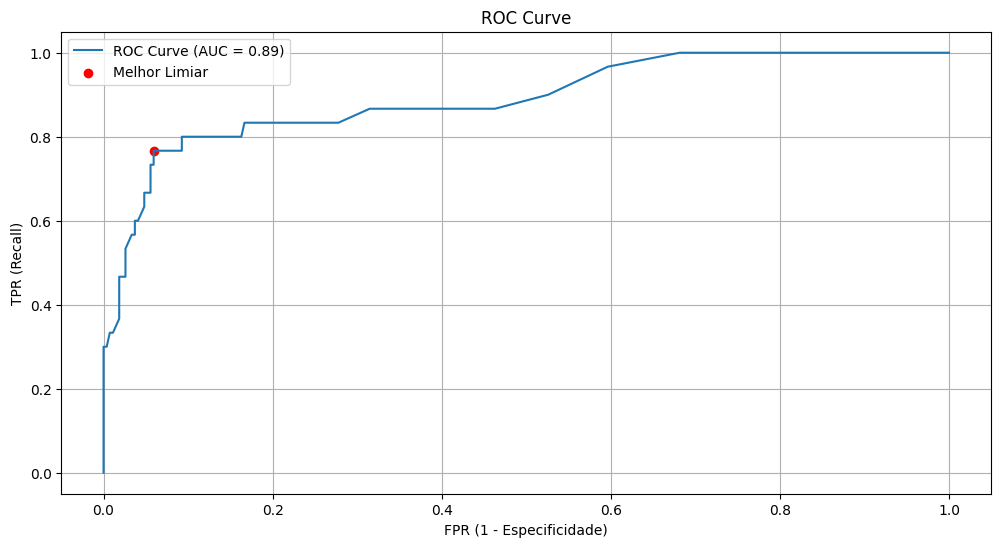

Acurácia: 0.92
Recall (Sensibilidade): 0.97
Especificidade: 0.59
Precisão: 0.94
F-Score: 0.96
F2-Score: 0.72

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       270
           1       0.59      0.77      0.67        30

    accuracy                           0.92       300
   macro avg       0.78      0.85      0.81       300
weighted avg       0.93      0.92      0.93       300



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def ajustar_e_avaliar_limiar(modelo, X_test, y_test):
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Calcular ROC Curve
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)

    # Encontrar especificidade (1 - FPR) e equilibrar com TPR (recall)
    especificidade = 1 - fpr
    equilibrio = tpr + especificidade
    melhor_limiar = thresholds_roc[np.argmax(equilibrio)]
    print(f"Melhor limiar para equilibrar Recall e Especificidade: {melhor_limiar:.2f}")

    # Gráfico Precision-Recall
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(12, 6))
    plt.plot(recall, precision, label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # Gráfico ROC
    plt.figure(figsize=(12, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc(fpr, tpr):.2f})")
    plt.scatter(fpr[np.argmax(equilibrio)], tpr[np.argmax(equilibrio)], color='red', label="Melhor Limiar")
    plt.xlabel("FPR (1 - Especificidade)")
    plt.ylabel("TPR (Recall)")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # Retornar predições ajustadas com o novo limiar
    return (y_pred_proba >= melhor_limiar).astype(int)

# Código principal
if __name__ == "__main__":
    # Dados de exemplo
    from sklearn.datasets import make_classification
    from sklearn.metrics import classification_report

    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Balancear os dados
    X_balanced, y_balanced = balancear_dados(X_train, y_train)

    # Treinar o modelo
    modelo = RandomForestClassifier(class_weight="balanced", random_state=42)
    modelo.fit(X_balanced, y_balanced)

    # Ajustar o limiar para equilibrar Recall e Especificidade
    y_pred_ajustado = ajustar_e_avaliar_limiar(modelo, X_test, y_test)

    # Calcular métricas
    vp, fp, fn, vn = confusion_matrix(y_test, y_pred_ajustado).ravel()
    metricas = calcular_metricas(vp, vn, fp, fn)

    # Exibir resultados
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor:.2f}")
    print(f"F2-Score: {fbeta_score(y_test, y_pred_ajustado, beta=2):.2f}")

    # Relatório detalhado
    print("\nRelatório de Classificação:\n")
    print(classification_report(y_test, y_pred_ajustado))
